In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
study_df=pd.read_csv("Resources/Study_results.csv")
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_df=pd.read_csv("Resources/Mouse_metadata.csv")
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
full_df=pd.merge(study_df, mouse_df, on="Mouse ID", how="left")
full_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
full_df.to_csv("Resources/Combined Results.csv")

## Summary statistics

In [131]:
summary_stats=pd.DataFrame({
    "Mean":full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    "Median":full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    "Variance":full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation":full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    "SEM":full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()    
})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


##  Bar plots

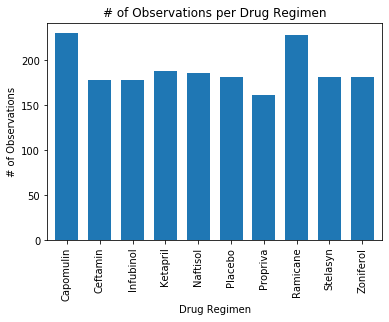

In [9]:
bar_data=full_df[["Drug Regimen","Tumor Volume (mm3)"]]
bar_chart=bar_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
bar_chart.plot(kind="bar",width=0.7)
plt.title("# of Observations per Drug Regimen")
plt.ylabel("# of Observations")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [18]:
bar_chartm=pd.DataFrame({
    "# of Observations":bar_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
})
bar_chartm

,# of Observations
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [20]:
bar_chartm=bar_chartm.reset_index()
bar_chartm

,Drug Regimen,# of Observations
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


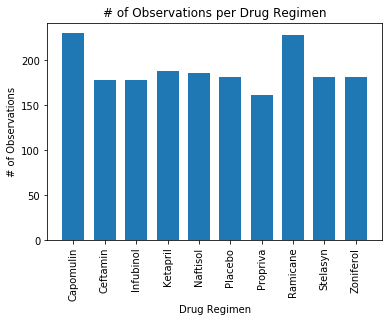

In [22]:
plt.bar(bar_chartm["Drug Regimen"],bar_chartm["# of Observations"],width=0.7)
plt.title("# of Observations per Drug Regimen")
plt.ylabel("# of Observations")
plt.xlabel("Drug Regimen")
plt.xticks(bar_chartm["Drug Regimen"],rotation=90)
plt.show()

##  Pie plots

In [58]:
pie_data=mouse_df[["Mouse ID","Sex"]]
pie_chart=pie_data.groupby("Sex")["Mouse ID"].count()
pie_chart

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [59]:
colors=["darkblue","lightskyblue"]
labels=["Female","Male"]
labels

['Female', 'Male']

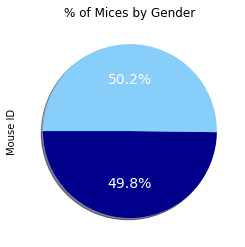

In [64]:
pie_chart.plot(kind="pie",colors=colors,autopct="%1.1f%%",startangle=180,shadow=True,textprops={'color':"w",'fontsize': 14})
plt.title("% of Mices by Gender")
plt.show()

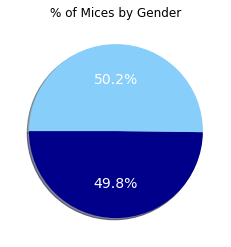

In [65]:
plt.pie(pie_chart,labels=labels,colors=colors,autopct="%1.1f%%",startangle=180,shadow=True,textprops={'color':"w",'fontsize': 14})
plt.title("% of Mices by Gender")
plt.show()

##  Quartiles, outliers and boxplots

In [66]:
tumor_volume=full_df[["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]]
tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,0,Capomulin,45.000000
1,f932,0,Ketapril,45.000000
2,g107,0,Ketapril,45.000000
3,a457,0,Ketapril,45.000000
4,c819,0,Ketapril,45.000000
...,...,...,...,...
1888,r944,45,Capomulin,41.581521
1889,u364,45,Capomulin,31.023923
1890,p438,45,Ceftamin,61.433892
1891,x773,45,Placebo,58.634971


In [68]:
f_tumor_volume_capomulin=tumor_volume.loc[(tumor_volume["Timepoint"]==45)&(tumor_volume["Drug Regimen"]=="Capomulin")]
f_tumor_volume_capomulin

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
1764,b128,45,Capomulin,38.982878
1769,t565,45,Capomulin,34.455298
1771,l509,45,Capomulin,41.483008
1777,g288,45,Capomulin,37.074024
1788,r554,45,Capomulin,32.377357
1791,g316,45,Capomulin,40.159220
1797,y793,45,Capomulin,31.896238
1800,m957,45,Capomulin,33.329098
1817,l897,45,Capomulin,38.846876
1821,v923,45,Capomulin,40.658124


In [69]:
f_tumor_volume_ceftamin=tumor_volume.loc[(tumor_volume["Timepoint"]==45)&(tumor_volume["Drug Regimen"]=="Ceftamin")]
f_tumor_volume_ceftamin

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
1765,l661,45,Ceftamin,59.851956
1766,y865,45,Ceftamin,64.729837
1767,y769,45,Ceftamin,68.594745
1772,j296,45,Ceftamin,61.849023
1790,w151,45,Ceftamin,67.527482
1810,l471,45,Ceftamin,67.748662
1855,x581,45,Ceftamin,64.634949
1856,a275,45,Ceftamin,62.999356
1858,k210,45,Ceftamin,68.923185
1862,x822,45,Ceftamin,61.386660


In [70]:
f_tumor_volume_infubinol=tumor_volume.loc[(tumor_volume["Timepoint"]==45)&(tumor_volume["Drug Regimen"]=="Infubinol")]
f_tumor_volume_infubinol

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
1779,y163,45,Infubinol,67.685569
1781,c139,45,Infubinol,72.226731
1784,z581,45,Infubinol,62.754451
1786,a251,45,Infubinol,65.525743
1789,k483,45,Infubinol,66.196912
1794,a685,45,Infubinol,66.083066
1802,e476,45,Infubinol,62.435404
1804,a203,45,Infubinol,67.973419
1806,f345,45,Infubinol,60.918767


In [71]:
f_tumor_volume_ketapril=tumor_volume.loc[(tumor_volume["Timepoint"]==45)&(tumor_volume["Drug Regimen"]=="Ketapril")]
f_tumor_volume_ketapril

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
1774,p189,45,Ketapril,75.294936
1775,m650,45,Ketapril,73.901399
1778,o331,45,Ketapril,78.567014
1782,c832,45,Ketapril,65.415955
1785,g497,45,Ketapril,69.872251
1792,m550,45,Ketapril,69.253503
1796,h246,45,Ketapril,74.104086
1803,k382,45,Ketapril,73.715619
1805,w422,45,Ketapril,67.989530
1807,y260,45,Ketapril,62.909441


In [80]:
f_tumor_volume_capomulin2=f_tumor_volume_capomulin["Tumor Volume (mm3)"]
f_tumor_volume_ceftamin2=f_tumor_volume_ceftamin["Tumor Volume (mm3)"]
f_tumor_volume_infubinol2=f_tumor_volume_infubinol["Tumor Volume (mm3)"]
f_tumor_volume_ketapril2=f_tumor_volume_ketapril["Tumor Volume (mm3)"]
f_tumor_volume_capomulin2

1764    38.982878
1769    34.455298
1771    41.483008
1777    37.074024
1788    32.377357
1791    40.159220
1797    31.896238
1800    33.329098
1817    38.846876
1821    40.658124
1829    38.939633
1838    36.041047
1843    28.430964
1846    28.484033
1849    23.343598
1850    37.311846
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [75]:
quartiles = f_tumor_volume_capomulin2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final Tumor Volume(mm3) is: {lowerq}")
print(f"The upper quartile of the final Tumor Volume(mm3) is: {upperq}")
print(f"The interquartile range of the final Tumor Volume(mm3) is: {iqr}")
print(f"The the median of the final Tumor Volume(mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final Tumor Volume(mm3) is: 32.37735684
The upper quartile of the final Tumor Volume(mm3) is: 40.1592203
The interquartile range of the final Tumor Volume(mm3) is: 7.781863460000004
The the median of the final Tumor Volume(mm3) is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [76]:
quartiles = f_tumor_volume_ceftamin2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final Tumor Volume(mm3) is: {lowerq}")
print(f"The upper quartile of the final Tumor Volume(mm3) is: {upperq}")
print(f"The interquartile range of the final Tumor Volume(mm3) is: {iqr}")
print(f"The the median of the final Tumor Volume(mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final Tumor Volume(mm3) is: 61.43389223
The upper quartile of the final Tumor Volume(mm3) is: 67.52748237
The interquartile range of the final Tumor Volume(mm3) is: 6.093590140000003
The the median of the final Tumor Volume(mm3) is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [77]:
quartiles = f_tumor_volume_infubinol2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final Tumor Volume(mm3) is: {lowerq}")
print(f"The upper quartile of the final Tumor Volume(mm3) is: {upperq}")
print(f"The interquartile range of the final Tumor Volume(mm3) is: {iqr}")
print(f"The the median of the final Tumor Volume(mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final Tumor Volume(mm3) is: 62.75445141
The upper quartile of the final Tumor Volume(mm3) is: 67.68556862
The interquartile range of the final Tumor Volume(mm3) is: 4.9311172099999965
The the median of the final Tumor Volume(mm3) is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [78]:
quartiles = f_tumor_volume_ketapril2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final Tumor Volume(mm3) is: {lowerq}")
print(f"The upper quartile of the final Tumor Volume(mm3) is: {upperq}")
print(f"The interquartile range of the final Tumor Volume(mm3) is: {iqr}")
print(f"The the median of the final Tumor Volume(mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final Tumor Volume(mm3) is: 67.12916566999999
The upper quartile of the final Tumor Volume(mm3) is: 74.002742395
The interquartile range of the final Tumor Volume(mm3) is: 6.873576725000007
The the median of the final Tumor Volume(mm3) is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


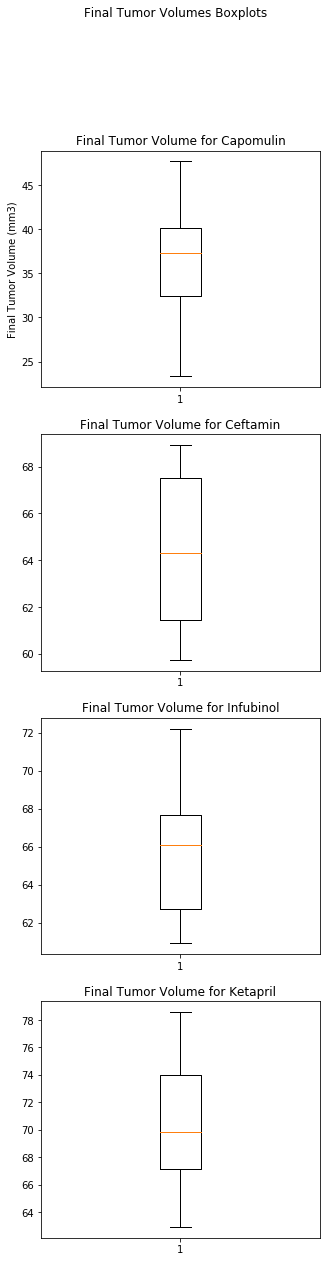

In [79]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,figsize=(5,20))
fig.suptitle("Final Tumor Volumes Boxplots")

ax1.set_title('Final Tumor Volume for Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(f_tumor_volume_capomulin2)

ax2.set_title('Final Tumor Volume for Ceftamin')
ax2.boxplot(f_tumor_volume_ceftamin2)

ax3.set_title('Final Tumor Volume for Infubinol')
ax3.boxplot(f_tumor_volume_infubinol2)

ax4.set_title('Final Tumor Volume for Ketapril')
ax4.boxplot(f_tumor_volume_ketapril2)

plt.show()


##  Line and scatter plots

In [81]:
capomulin=full_df[["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]]
capomulin_chart=capomulin.loc[(capomulin["Mouse ID"]=="b128")&(capomulin["Drug Regimen"]=="Capomulin")]
capomulin_chart

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,0,Capomulin,45.000000
472,b128,5,Capomulin,45.651331
679,b128,10,Capomulin,43.270852
719,b128,15,Capomulin,43.784893
933,b128,20,Capomulin,42.731552
1268,b128,25,Capomulin,43.262145
1400,b128,30,Capomulin,40.605335
1547,b128,35,Capomulin,37.967644
1629,b128,40,Capomulin,38.379726
1764,b128,45,Capomulin,38.982878


In [82]:
x_axis=capomulin_chart["Timepoint"]
y_axis=capomulin_chart["Tumor Volume (mm3)"]

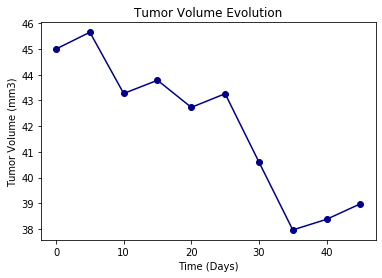

In [84]:
plt.plot(x_axis,y_axis,marker="o",color="darkblue")
plt.title("Tumor Volume Evolution")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.show()

In [85]:
capomulin2=full_df[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Weight (g)"]]
capomulin2=capomulin2.loc[capomulin["Drug Regimen"]=="Capomulin"]
capomulin2

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Weight (g)
0,b128,Capomulin,45.000000,22
226,j246,Capomulin,45.000000,21
227,r554,Capomulin,45.000000,17
228,s185,Capomulin,45.000000,17
229,b742,Capomulin,45.000000,21
...,...,...,...,...
1854,s710,Capomulin,40.728578,23
1859,j119,Capomulin,38.125164,23
1878,i557,Capomulin,47.685963,24
1888,r944,Capomulin,41.581521,25


In [86]:
capomulin_scatter=pd.DataFrame({
    "Avg Tumor Volume":capomulin2.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(),
    "Mouse Weight":capomulin2.groupby("Mouse ID")["Weight (g)"].agg(lambda x: x.iloc[0])
})
capomulin_scatter

,Avg Tumor Volume,Mouse Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


In [94]:
x_axis = capomulin_scatter["Mouse Weight"]
y_axis = capomulin_scatter["Avg Tumor Volume"]

In [123]:
Corr_Coeff=round(st.pearsonr(x_axis,y_axis)[0],2)

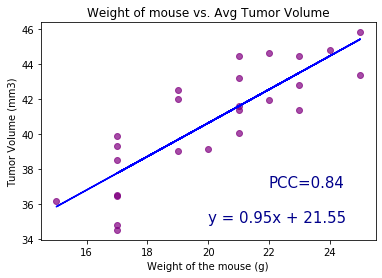

In [128]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regression = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis,marker="o",color="purple",alpha=0.7)
plt.title("Weight of mouse vs. Avg Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight of the mouse (g)")

plt.plot(x_axis,regression,"b-")
plt.annotate(line_eq,(20,35),fontsize=15,color="darkblue")
plt.annotate(f"PCC={Corr_Coeff}",(22,37),fontsize=15,color="darkblue")

plt.show()

## Conclusions of the Analysis

* Capomulin and Ramicane are the 2 drugs with the highest observations, which indicates a greater testing.
* Kerapril and Naftisol are the drug regimens with the most widespread observations (greatest standard deviation).
* Mouse population is almost evenly spread between females and males.
* Among the 5 most popular Drug Regimens (Capomulin, Ceftamin, Infubinol & Ketapril), Capomulin is the drug with the lowest final tumor volume on average (measured at day 45), although it has the highest IQR.
* There are no outliers within the tumor volumes of these Drug Regimens, which makes the results more reliable.
* As shown by Mouse 'b128' in the Tumor Volume Evolution figure for Capomulin, tumor volume diminishes among time, with important drops after day 30.
* Lastly and as observed on the Weight of mouse vs. Avg Tumor Volume figure, PCC indicates a good correlation between weight of the mouse and avg tumor volume, with the last one almost increasing in 1 mm3 per 1 gr increase in the weight of the mouse.